<a href="https://colab.research.google.com/github/JTNghia/AI_Subject/blob/main/LSTM_for_FuckingPPO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Git Clone && Pip install (OK)

In [ ]:
!git clone https://github.com/LeQuangHuyUIT/Stock-Trading-Environment

Cloning into 'Stock-Trading-Environment'...
remote: Enumerating objects: 516, done.
remote: Counting objects: 100% (478/478), done.
remote: Compressing objects: 100% (354/354), done.
remote: Total 516 (delta 248), reused 351 (delta 124), pack-reused 38
Receiving objects: 100% (516/516), 11.71 MiB | 28.14 MiB/s, done.
Resolving deltas: 100% (258/258), done.


In [ ]:
!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip
!pip install --upgrade mplfinance
!pip install ta
!pip install tensorboardX

     | 399kB 2.1MB/s
  Created wheel for mpl-finance: filename=mpl_finance-0.10.1-cp37-none-any.whl size=8437 sha256=01162d4d75cbe028268fc070333b9e91a8b68e1c594176cc5426c10727a5cb0c
  Stored in directory: /tmp/pip-ephem-wheel-cache-z3b7kac3/wheels/8f/bf/8a/6c858b2a3be945c7b2d658fbf6ab797b451d686cbee8aa2679
Successfully built mpl-finance
     |████████████████████████████████| 71kB 3.8MB/s 
  Created wheel for ta: filename=ta-0.7.0-cp37-none-any.whl size=28716 sha256=cc72dd66bc1974483873a05739d144fe712168313f05693e97a91c1333647e52
  Stored in directory: /root/.cache/pip/wheels/dd/88/30/de9553fb54a474eb7480b937cdbb140bdda613d29cf4da7994
Successfully built ta
     |████████████████████████████████| 133kB 6.5MB/s 


In [ ]:
%cd ./Stock-Trading-Environment

/content/Stock-Trading-Environment


# import Lib

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras import backend as K
#tf.config.experimental_run_functions_eagerly(True) # used for debuging and development
tf.compat.v1.disable_eager_execution() # usually using this for fastest performance

gpus = tf.config.experimental.list_physical_devices('GPU')
if len(gpus) > 0:
    print(f'GPUs {gpus}')
    try: tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError: pass
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import copy
import pandas as pd
import numpy as np
import random
from collections import deque
from tensorboardX import SummaryWriter
from tensorflow.keras.optimizers import Adam, RMSprop
# from env.indicators import *
from tensorboardX import SummaryWriter
from env.model import Actor_Model, Critic_Model, Shared_Model
from env.utils import *
from env.StockTradingEnv2 import CustomEnv, CustomAgent, train_agent, test_agent

In [ ]:
# Garbage Collector - use it like gc.collect()
import gc
gc.collect()

50

# load data fpt

In [ ]:
df = pd.read_csv("data/fpt_indicators.csv")
df = df.sort_values('Date')
lookback_window_size = 10
test_window = 52
# split training and testing datasets
train_df = df[:-test_window-lookback_window_size] 
test_df = df[-test_window-lookback_window_size:]


# train with fpt (don't run)

In [ ]:
train_env = CustomEnv(train_df, lookback_window_size= lookback_window_size)
agent = CustomAgent(lookback_window_size, 0.0001, model= 'LSTM')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 18)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 10, 512)           1087488   
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               787456    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 195 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


InvalidArgumentError: ignored

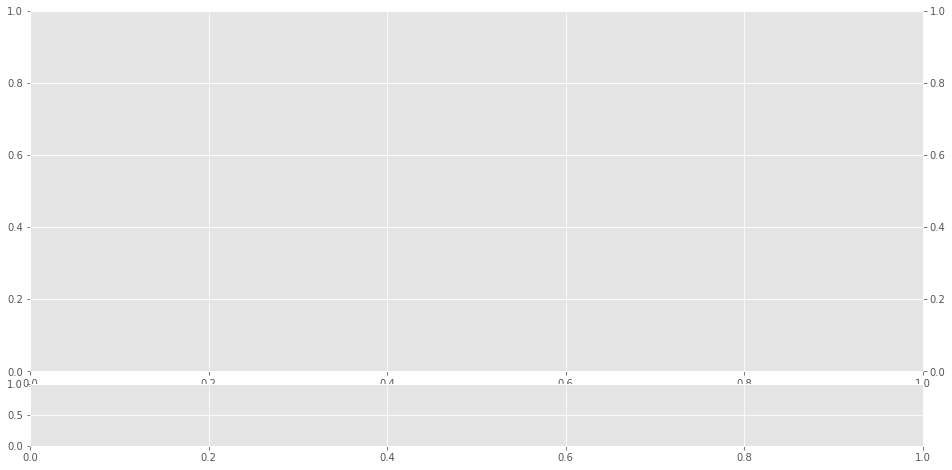

In [ ]:
train_agent(train_env, agent, train_episodes= 10000, training_batch_size=60)

In [ ]:
test_env = CustomEnv(test_df, lookback_window_size= lookback_window_size)